In [1]:
import numpy as  np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys
from astropy import units as un
from scipy import constants as cs
from scipy import interpolate

sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from GC_Orbit_class import GCorbit

import galpy.potential as galpot
from galpy.orbit import Orbit
from galpy.util import bovy_coords
from galpy.actionAngle import actionAngleIsochrone

%matplotlib inline

In [2]:
#data: need actions J_r, J_phi, J_theta
if 0:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [3]:
mges=np.sum(m1+m2)
G=(un.m**3/(un.kg*un.s**2)).to(un.pc**3/(un.solMass*un.s**2), cs.G) #m3 / (kg s2) to pc³/(Msun*s²)
r=np.linspace(np.min(r_3d[1:]),np.max(r_3d),100)
b=10.
b2=b**2.
z0=0
r2= r**2.+z0**2.
rb= np.sqrt(r2+b2)
rho=mges*((3.*(b+rb)*rb**2.-r2*(b+3.*rb))/rb**3./(b+rb)**3./4./np.pi) #Einheit Msun/pc**3

test=GCorbit(r_pc=r,rho_M_sunpc3=rho,bhmass_M_sun=np.sum(m1[0]+m2[0]))

pot_iso=-G*mges/(b+np.sqrt(b**2.+r**2))

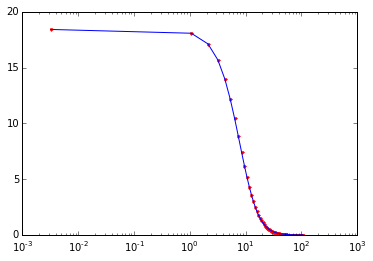

In [4]:
#test if GCorbit.density is right
plt.semilogx(r,test.density(r),'r.',r,rho,'b-')


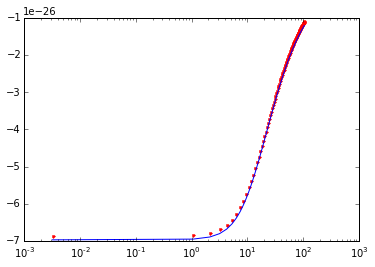

In [5]:
#test if GCorbit._potential_stars is right
plt.semilogx(r,test._potential_stars(r=r,density=test.density(r)),'r.',r,pot_iso,'b-')


In [6]:
#test if GCorbit.orbit_integration is right
n=78363
xo,yo,zo,vxo,vyo,vzo,to=test.orbit_integration(x[n],y[n],z[n],vx[n],vy[n],vz[n],dt=100000,t_end=1000000000)


##### galpy orbit #####
#in Galactocentric cylindrical coordinates vxvv=[R,vR,vT(,z,vz,phi)]

#xim=un.pc.to(un.m,x[n])
#yim=un.pc.to(un.m,y[n])
#zim=un.pc.to(un.m,z[n])
#vxim=(un.km/un.s).to(un.m/un.s,vx[n])
#vyim=(un.km/un.s).to(un.m/un.s,vy[n])
#vzim=(un.km/un.s).to(un.m/un.s,vz[n])
#R,phi,z_new=bovy_coords.rect_to_cyl(xim,yim,zim) #ort
#vR,vT,vz_new=bovy_coords.rect_to_cyl_vec(vxim,vyim,vzim,xim,yim,zim) #geschw
#o=Orbit(vxvv=[R,vR,vT,z_new,vz_new,phi])
#o.integrate(to,pot_iso)

SystemExit: Error in GCorbit._potential_stars(): r is smaller or bigger than star boundaries

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:
plt.plot(xo,yo)

In [ ]:
#test if GCorbit.actions is right